# PROBLEM STATEMENT

- Let's assume that you work as a consultant to a start-up company that has just started to hire employees. The HR director reached out to you and asked you to predict the salary of employees based on the number of years of experience. You suggested to use a polynomial regression model to try to create a model using the provided dataset. 

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import Dataset

In [2]:
dataset = pd.read_csv('dataset/Employee_Salary.csv')

In [3]:
dataset.head()

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448


In [4]:
dataset.tail()

,Years of Experience,Salary
1995,19.178575,421534.6910
1996,19.254499,430478.0265
1997,19.353369,438090.8454
1998,19.842520,482242.1608
1999,20.000000,500000.0000


In [5]:
dataset.describe()

,Years of Experience,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  2000 non-null   float64
 1   Salary               2000 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB


# Visualize Data 

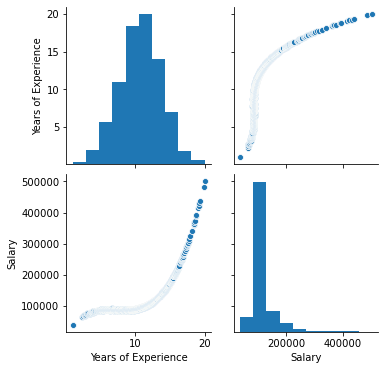

In [7]:
sns.pairplot(dataset)

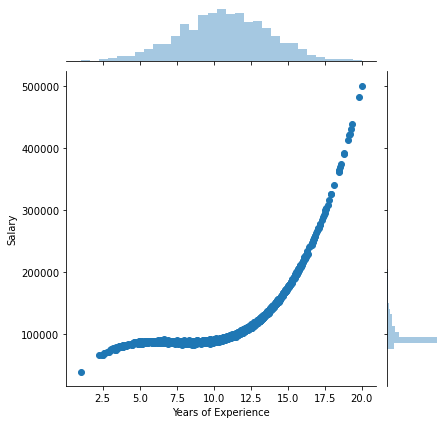

In [8]:
sns.jointplot(x = 'Years of Experience', y = 'Salary', data = dataset)

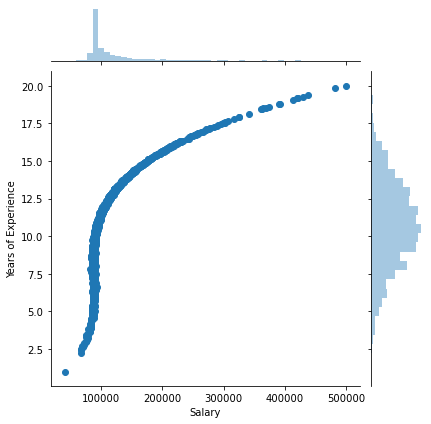

In [9]:
sns.jointplot(x = 'Salary', y = 'Years of Experience', data = dataset)

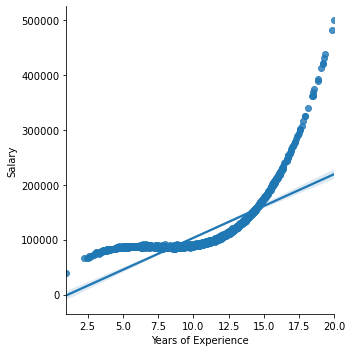

In [10]:
sns.lmplot(x = 'Years of Experience', y = 'Salary', data = dataset)

# Create Training Dataset 

In [11]:
X = dataset[['Years of Experience']]
y = dataset['Salary']

print(X)
print(y)

      Years of Experience
0                1.000000
1                2.257942
2                2.450875
3                2.498713
4                2.613729
...                   ...
1995            19.178575
1996            19.254499
1997            19.353369
1998            19.842520
1999            20.000000

[2000 rows x 1 columns]
0        40000.00000
1        65979.42119
2        67253.57549
3        67342.43510
4        70532.20448
            ...     
1995    421534.69100
1996    430478.02650
1997    438090.84540
1998    482242.16080
1999    500000.00000
Name: Salary, Length: 2000, dtype: float64


# Training Model 

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
poly_model = PolynomialFeatures(degree = 2)

In [13]:
X_columns = poly_model.fit_transform(X)
X_columns

array([[  1.        ,   1.        ,   1.        ],
       [  1.        ,   2.25794198,   5.09830199],
       [  1.        ,   2.45087546,   6.00679053],
       ...,
       [  1.        ,  19.35336879, 374.55288352],
       [  1.        ,  19.84251968, 393.72558725],
       [  1.        ,  20.        , 400.        ]])

In [14]:
linear_model.fit(X_columns, y)

LinearRegression()

In [15]:
print('Model Coeff: ', linear_model.coef_)

Model Coeff:  [     0.         -33106.32895617   2095.78613853]


# Visualize the Result

In [16]:
y_pred = linear_model.predict(poly_model.fit_transform(X))
y_pred.shape

(2000,)

Text(0.5, 1.0, 'Years of Experience vs Salary (Poly = 2)')

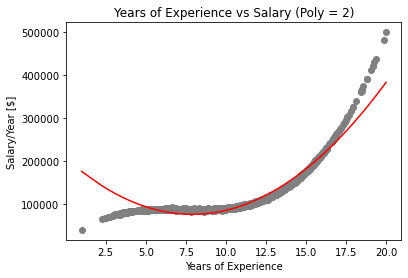

In [17]:
plt.scatter(X, y, color = 'gray')
plt.plot(X, y_pred, color = 'red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary/Year [$]')
plt.title('Years of Experience vs Salary (Poly = 2)')

In [18]:
linear_model = LinearRegression()
poly_model = PolynomialFeatures(degree = 3)
X_columns = poly_model.fit_transform(X)
linear_model.fit(X_columns, y)

print('Model Coeff: ', linear_model.coef_)

Model Coeff:  [    0.         32261.24327461 -4503.00578987   205.20736238]


In [19]:
y_pred = linear_model.predict(poly_model.fit_transform(X))
y_pred.shape

(2000,)

Text(0.5, 1.0, 'Years of Experience vs Salary (Poly = 3)')

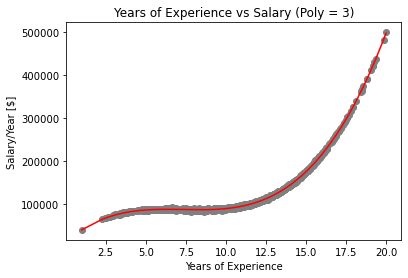

In [20]:
plt.scatter(X, y, color = 'gray')
plt.plot(X, y_pred, color = 'red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary/Year [$]')
plt.title('Years of Experience vs Salary (Poly = 3)')